<a href="https://colab.research.google.com/github/sedavasema/one-shot-learning/blob/main/4_my_introfacerecognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install git+https://github.com/rcmalli/keras-vggface.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/rcmalli/keras-vggface.git to /tmp/pip-req-build-kb8zscbb
  Running command git clone --filter=blob:none --quiet https://github.com/rcmalli/keras-vggface.git /tmp/pip-req-build-kb8zscbb
  Resolved https://github.com/rcmalli/keras-vggface.git to commit bee35376e76e35d00aeec503f2f242611a97b38a
  Preparing metadata (setup.py) ... done


In [2]:
!mkdir images

In [3]:
!wget https://raw.githubusercontent.com/sedavasema/one-shot-learning/main/folder/moh.jpg -P images
!wget https://raw.githubusercontent.com/sedavasema/one-shot-learning/main/folder/moh_prob.jpg -P images
!wget https://raw.githubusercontent.com/sedavasema/one-shot-learning/main/folder/daraee.jpg -P images
!wget https://raw.githubusercontent.com/sedavasema/one-shot-learning/main/folder/daraee_prob.jpg -P images
!wget https://raw.githubusercontent.com/sedavasema/one-shot-learning/main/folder/zaree.jpg -P images
!wget https://raw.githubusercontent.com/sedavasema/one-shot-learning/main/folder/zaree_prob.jpg -P images
!wget https://raw.githubusercontent.com/sedavasema/one-shot-learning/main/folder/tahmasbi.jpg -P images
!wget https://raw.githubusercontent.com/sedavasema/one-shot-learning/main/folder/tahmasbi_prob.jpg -P images
!wget https://raw.githubusercontent.com/sedavasema/one-shot-learning/main/folder/who_is.jpg -P images

--2023-06-11 13:41:59--  https://raw.githubusercontent.com/sedavasema/one-shot-learning/main/folder/moh.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 132827 (130K) [image/jpeg]
Saving to: ‘images/moh.jpg’

moh.jpg             100%[===================>] 129.71K  --.-KB/s    in 0.004s  

2023-06-11 13:41:59 (32.0 MB/s) - ‘images/moh.jpg’ saved [132827/132827]

--2023-06-11 13:41:59--  https://raw.githubusercontent.com/sedavasema/one-shot-learning/main/folder/moh_prob.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 27504 (2

In [4]:
!pip install keras_applications

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
import numpy as np
from keras.preprocessing import image
from keras_vggface.vggface import VGGFace
from keras_vggface import utils

In [6]:
model = VGGFace(model='resnet50') # default : VGG16 , you can use model='resnet50' or 'senet50'

In [18]:
model.summary()

Model: "vggface_resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1/7x7_s2 (Conv2D)          (None, 112, 112, 64  9408        ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 conv1/7x7_s2/bn (BatchNormaliz  (None, 112, 112, 64  256        ['conv1/7x7_s2[0][0]']           
 ation)                         )                                                  

In [7]:
model.inputs

[<KerasTensor: shape=(None, 224, 224, 3) dtype=float32 (created by layer 'input_1')>]

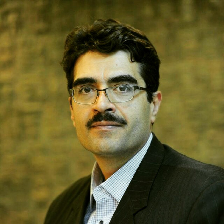

In [8]:
# Change the image path with yours.
img = image.image_utils.load_img('./images/moh.jpg', target_size=(224, 224))
img

In [9]:
type(img)

PIL.Image.Image

In [10]:
x = image.image_utils.img_to_array(img)

In [11]:
x=x.reshape(1,224,224,3)

In [41]:
x = np.expand_dims(x, axis=0)

In [12]:
x = utils.preprocess_input(x, version=1) # or version=2

In [13]:
preds = model.predict(x)

1/1 [==============================] - 2s 2s/step


In [14]:
print('Predicted:', utils.decode_predictions(preds))

Predicted: [[["b' Teofisto_Guingona_III'", 0.0011702369], ["b' Naheed_Nenshi'", 0.00096570974], ["b' Viswanathan_Anand'", 0.0009123012], ["b' Lim_Kit_Siang'", 0.00089914666], ["b' Ranidel_de_Ocampo'", 0.0008973739]]]


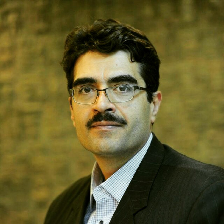

In [15]:
#read images
moh = image.image_utils.load_img('./images/moh.jpg', target_size=(224, 224))
moh

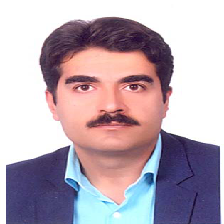

In [16]:
moh_prob = image.image_utils.load_img('./images/moh_prob.jpg', target_size=(224, 224))
moh_prob

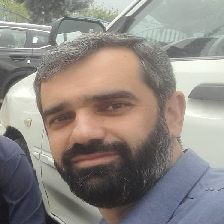

In [17]:
zaree =image.image_utils.load_img('./images/zaree.jpg', target_size=(224, 224))
zaree

In [18]:
# Convolution Features
vgg_features = VGGFace(model='resnet50',include_top=False, input_shape=(224, 224, 3), pooling='max') # pooling: None, avg or max

In [19]:
vgg_features.summary()

Model: "vggface_resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1/7x7_s2 (Conv2D)          (None, 112, 112, 64  9408        ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 conv1/7x7_s2/bn (BatchNormaliz  (None, 112, 112, 64  256        ['conv1/7x7_s2[0][0]']           
 ation)                         )                                                  

In [21]:
def get_embedding(img):
    x = image.image_utils.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = utils.preprocess_input(x, version=1) # or version=2
    emb = vgg_features.predict(x)
    return emb

In [22]:
emb1 = get_embedding(moh)
emb2 = get_embedding(moh_prob)
emb3 = get_embedding(zaree)

1/1 [==============================] - 1s 1s/step


In [24]:
def findEuclideanDistance(source_representation, test_representation):
    euclidean_distance = source_representation - test_representation
    euclidean_distance = np.sum(np.multiply(euclidean_distance, euclidean_distance))
    euclidean_distance = np.sqrt(euclidean_distance)
    return euclidean_distance

In [25]:
def cosinDistance(source_representation, test_representation):
    from numpy import linalg as LA
    test_representation=np.transpose(test_representation)
    cosine = np.dot(source_representation,test_representation)/(LA.norm(source_representation)*LA.norm(test_representation))
    cosine=np.asscalar(cosine)
    return 1-cosine

In [26]:
dist1=cosinDistance(emb1[0],emb2[0])
dist2=cosinDistance(emb1,emb3)
dist3 = findEuclideanDistance(emb1, emb2)
dist4 = findEuclideanDistance(emb1, emb3)

<ipython-input-25-2d3c886ed3ba>:5: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  cosine=np.asscalar(cosine)


In [27]:
print ("distance cosin moh and moh_prob =", dist1)
print ("distance cosin moh and zaree ="   , dist2)

print ("distance Euclideasan moh and moh_prob =", dist3)
print ("distance Euclideasan moh and zaree =", dist4)

distance cosin moh and moh_prob = 0.6277939081192017
distance cosin moh and zaree = 0.79605932533741
distance Euclideasan moh and moh_prob = 83.874245
distance Euclideasan moh and zaree = 92.67357
